# Lab 4 - Linear models

We focus on models in the form 

$$ y ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$

or in generalized form (generalized linear models)

$$ f(y) ~ \mathrm{Normal}(\alpha+X\beta,\sigma) $$

where $f(y)$ is a link function, for example - logit.


In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

## Excercise 1 - modelling height of !Kung people

### Normal model - no predictors
We will try to fit $\mathrm{Normal}(\mu,\sigma)$ distribution to height data. Special case of linear model with $\beta=0$.

In [2]:
_BASE_URL = "https://raw.githubusercontent.com/rmcelreath/rethinking/Experimental/data"
HOWELL_DATASET_PATH = f"{_BASE_URL}/Howell1.csv"
d = pd.read_csv(HOWELL_DATASET_PATH, sep=';', header=0)
d=d[d.age>=18] #just adults 
d.head()

,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1
4,145.415,41.276872,51.0,0


In [5]:
model_ppc=CmdStanModel(stan_file='height_1_ppc.stan')

R = 1000
sim=model_ppc.sample(iter_sampling=R,
                     iter_warmup=0,
                     chains=1,
                     fixed_param=True,
                     seed=29042020,refresh=R)

INFO:cmdstanpy:compiling stan file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 4 - Linear models\height_1_ppc.stan to exe file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 4 - Linear models\height_1_ppc.exe
INFO:cmdstanpy:compiled model executable: C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 4 - Linear models\height_1_ppc.exe
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### Task 1. Prior predictive checks

1. Plot histograms of mu, sigma and simulated height.
2. Plot a joint distribution of mu and sigma.
3. Check if samples are consistent with priors
4. Check if observed data is possible to obtain using priors.

(array([ 1.,  0.,  1.,  1.,  0.,  1.,  2.,  3.,  4.,  3.,  1.,  4.,  0.,
         5.,  2.,  6.,  8.,  5.,  9., 10.,  8., 10., 11., 13.,  9., 13.,
        15., 17., 13., 23., 22., 29., 23., 26., 24., 21., 23., 30., 23.,
        22., 22., 29., 18., 28., 21., 24., 24., 22., 21., 24., 28., 19.,
        22., 21., 26., 27., 14., 21., 13., 14., 10.,  8., 15.,  8.,  9.,
         9.,  7., 10.,  6.,  5.,  5.,  4.,  2.,  2.,  3.,  2.,  1.,  2.,
         4.,  3.,  0.,  1.,  1.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([120.393  , 121.73893, 123.08486, 124.43079, 125.77672, 127.12265,
        128.46858, 129.81451, 131.16044, 132.50637, 133.8523 , 135.19823,
        136.54416, 137.89009, 139.23602, 140.58195, 141.92788, 143.27381,
        144.61974, 145.96567, 147.3116 , 148.65753, 150.00346, 151.34939,
        152.69532, 154.04125, 155.38718, 156.73311, 158.07904, 159.42497,
        160.7709 , 162.11683, 163.46276, 164.80869, 166.15462, 1

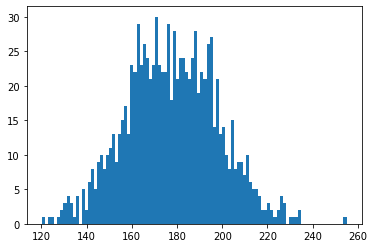

In [25]:
plt.hist(sim.stan_variable('mu'), bins=100)

(array([66., 72., 53., 52., 54., 50., 47., 48., 47., 45., 29., 19., 30.,
        22., 28., 22., 16., 15., 20., 16., 21., 11., 10., 20., 11.,  8.,
        11.,  9., 12., 10., 12.,  6.,  6., 12.,  9.,  7.,  6.,  1.,  8.,
         2.,  4.,  1.,  2.,  4.,  1.,  1.,  4.,  3.,  5.,  3.,  1.,  3.,
         2.,  0.,  1.,  1.,  0.,  3.,  2.,  2.,  1.,  0.,  0.,  2.,  0.,
         0.,  0.,  3.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([2.85171000e-02, 1.06810193e+00, 2.10768676e+00, 3.14727159e+00,
        4.18685642e+00, 5.22644124e+00, 6.26602607e+00, 7.30561090e+00,
        8.34519573e+00, 9.38478056e+00, 1.04243654e+01, 1.14639502e+01,
        1.25035350e+01, 1.35431199e+01, 1.45827047e+01, 1.56222895e+01,
        1.66618744e+01, 1.77014592e+01, 1.87410440e+01, 1.97806289e+01,
        2.08202137e+01, 2.18597985e+01, 2.28993833e+01, 2.39389682e+01,
  

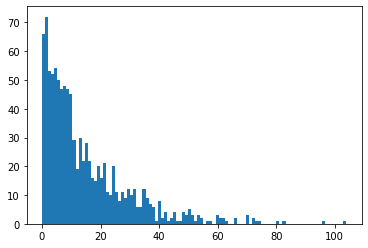

In [22]:
plt.hist(sim.stan_variable('sigma'), bins=100)

(array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
         0.,  0.,  0.,  1.,  0.,  5.,  2.,  3.,  7.,  5., 12., 10.,  8.,
        11., 26., 25., 23., 37., 57., 42., 58., 48., 53., 52., 59., 53.,
        52., 50., 47., 44., 34., 32., 27., 20., 13., 15., 15.,  8.,  6.,
         7.,  2.,  6.,  2.,  3.,  3.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,
         1.,  0.,  1.,  0.,  2.,  0.,  1.,  0.,  1.]),
 array([-56.5901  , -52.864329, -49.138558, -45.412787, -41.687016,
        -37.961245, -34.235474, -30.509703, -26.783932, -23.058161,
        -19.33239 , -15.606619, -11.880848,  -8.155077,  -4.429306,
         -0.703535,   3.022236,   6.748007,  10.473778,  14.199549,
         17.92532 ,  21.651091,  25.376862,  29.102633,  32.828404,
         36.554175,  40.279946,  44.005717,  47.731488,  51.457259,
         55.18303 ,  58.90

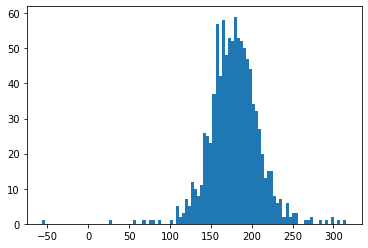

In [23]:
plt.hist(sim.stan_variable('height'), bins=100)

In [31]:
#Convertion to arviz InferenceData
arviz_result = az.from_cmdstanpy(
    posterior=sim
)
#Calculating log sigma
post = arviz_result.posterior
post["log_sigma"] = np.log(post["sigma"])
arviz_result

Inference data with groups:
	> posterior
	> sample_stats

c:\python3810\lib\site-packages\arviz\plots\pairplot.py:229: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


<AxesSubplot:xlabel='mu', ylabel='sigma'>

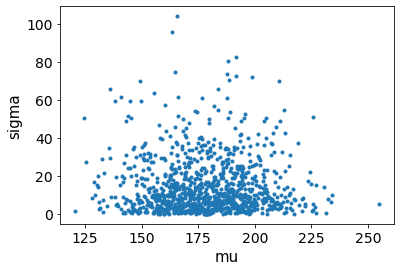

In [24]:
az.plot_pair(arviz_result, var_names=['mu', 'sigma'], divergences=True)

(array([ 2.,  0.,  2.,  2.,  2.,  6.,  2.,  8., 10.,  6.,  8., 14., 10.,
        10., 20., 12.,  8., 16., 17.,  7., 17., 14.,  6., 15., 13.,  8.,
        14., 12., 15., 16., 11.,  5., 11.,  2.,  6.,  8.,  1.,  2.,  4.,
         3.,  3.,  1.,  2.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([136.525 , 137.3759, 138.2268, 139.0777, 139.9286, 140.7795,
        141.6304, 142.4813, 143.3322, 144.1831, 145.034 , 145.8849,
        146.7358, 147.5867, 148.4376, 149.2885, 150.1394, 150.9903,
        151.8412, 152.6921, 153.543 , 154.3939, 155.2448, 156.0957,
        156.9466, 157.7975, 158.6484, 159.4993, 160.3502, 161.2011,
        162.052 , 162.9029, 163.7538, 164.6047, 165.4556, 166.3065,
        167.1574, 168.0083, 168.8592, 169.7101, 170.561 , 171.4119,
        172.2628, 173.1137, 173.9646, 174.8155, 175.6664, 176.5173,
        177.3682, 178.2191, 179.07  ]),
 <BarContainer object of 50 artists>)

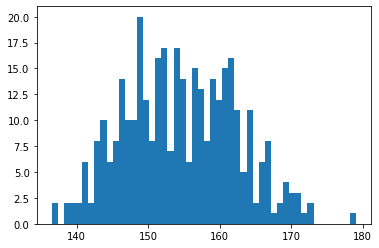

In [37]:
plt.hist(d['height'], bins=50)

In [7]:
model_1_fit=CmdStanModel(stan_file='height_1_fit.stan')

INFO:cmdstanpy:compiling stan file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 4 - Linear models\height_1_fit.stan to exe file C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 4 - Linear models\height_1_fit.exe
INFO:cmdstanpy:compiled model executable: C:\STUFF\8th_semester\public_lectures\Data Analytics 2022\Lab 4 - Linear models\height_1_fit.exe
--- Translating Stan model to C++ code ---
bin/stanc.exe  --o=C:/STUFF/8TH_SE~1/PUBLIC~1/DATAAN~1/LAB4-L~1/height_1_fit.hpp C:/STUFF/8TH_SE~1/PUBLIC~1/DATAAN~1/LAB4-L~1/height_1_fit.stan
Warning in 'C:/STUFF/8TH_SE~1/PUBLIC~1/DATAAN~1/LAB4-L~1/height_1_fit.stan', line 3, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc

--- Compiling, linking C++ code ---
g++ -std=c++1y -m64 -D_REENTRANT -Wall -Wno-unused-fu

In [8]:
fit=model_1_fit.sample(data=dict(N=len(d),
                                   heights=d.height.values),
                         seed=28052020)

INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### Task 2. Model fit and evaluation

1. Plot a joint distribution of fitted mu and sigma.
2. Plot histograms of data and simulated heights and evaluate the quality of model.



c:\python3810\lib\site-packages\arviz\plots\pairplot.py:229: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


<AxesSubplot:xlabel='mu', ylabel='sigma'>

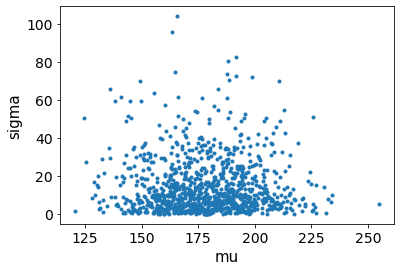

In [32]:
# Task 2.1

arviz_result = az.from_cmdstanpy(
    posterior=sim
)
az.plot_pair(arviz_result, var_names=['mu', 'sigma'], divergences=True)

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.,   0.,   0.,   3.,   2.,   4.,   0.,   0.,   4.,   0.,   7.,
          4.,   7.,   9.,  10.,   9.,  18.,   8.,  27.,  21.,  18.,  18.,
         42.,  35.,  52.,  42.,  46.,  56.,  75.,  50.,  74.,  79., 106.,
         80.,  93.,  92., 125., 121., 110., 119., 132., 109., 109., 117.,
        113., 145., 110., 105., 106.,  93., 108., 111., 105.,  92.,  83.,
         84.,  71.,  60.,  66.,  59.,  71.,  49.,  43.,  41.,  44.,  23.,
         38.,  26.,  18.,  27.,  14.,  13.,   9.,   9.,   5.,   5.,   4.,
          1.,   2.,   1.,   3.,   0.,   3.,   2.,   0.,   0.,   0.,   1.,
          1.]),
 array([122.657  , 123.24082, 123.82464, 124.40846, 124.99228, 125.5761 ,
        126.15992, 126.74374, 127.32756, 127.91138, 128.4952 , 129.07902,
        129.66284, 130.24666, 130.83048, 131.4143 , 131.99812, 132.58194,
        133.16576, 133.74958, 134.3334 , 134.91722, 135.50104, 136.08486,
        136.66868, 137

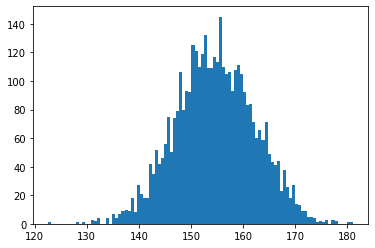

In [35]:
plt.hist(fit.stan_variable('height'), bins=100)

### Adding predictor to the model - weight

Create column ```c_weight``` in the dataframe containing weights substrated by their mean.


In [52]:
mean_weight = d['weight'].mean()
c_weight = list()
for item in d['weight']:
    c_weight.append(item-mean_weight)
d.insert(3, 'c_weight', c_weight)

ValueError: cannot insert c_weight, already exists

In [53]:
print(d.head())

    height     weight   age   c_weight  male
0  151.765  47.825606  63.0   2.835121     1
1  139.700  36.485807  63.0  -8.504679     0
2  136.525  31.864838  65.0 -13.125648     0
3  156.845  53.041914  41.0   8.051429     1
4  145.415  41.276872  51.0  -3.713614     0


In [48]:
model_ppc=CmdStanModel(stan_file='height_2a_ppc.stan')
R = 1000
data_sim={'N':50, 'weight':np.linspace(d.c_weight.min(),d.c_weight.max())}
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


(array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,

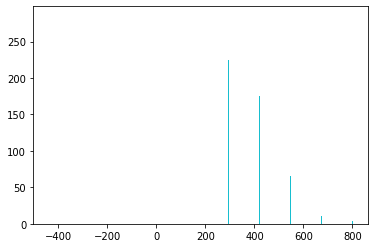

In [50]:
plt.hist(sim.stan_variable('height'))

#### Task 4. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.

### Modifying prior

If prior for beta admits negative values, then it makes no sense. Lets change prior to lognormal distribution.


In [ ]:
model_ppc=CmdStanModel(stan_file='height_2b_ppc.stan')

In [ ]:
sim=model_ppc.sample(data=data_sim, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

#### Task 5. Prior predictive checks
1. Plot lines for each sampled slope beta and intercept alpha, verify if possible predicted heights are consistent with minimum (0) and maximum (check Wikipedia) heights observed in nature.
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data. Is observed data possible within the prior model?

### Fitting data


In [ ]:
model_2_fit=CmdStanModel(stan_file='height_2_fit.stan')

#### Task 6. Preparing data for fit
1. Create ```data_fit``` dictionary containing data from  ```N``` first rows of dataframe

In [ ]:
fit=model_2_fit.sample(data=data_fit,seed=28052020)


#### Task 7. Evaluating model

1. Plot lines for each sampled slope beta and intercept alpha. Verify how uncertainity changes with increasing of sample (N)
2. For each simulated weight plot maximum, minimum, and 5, 25, 50, 75, 95 quantiles of simulated weight (all in the same plot). Compare with observed data (N points). Is observed data possible within the posterior model? What changes when N increases.
